## Assignment 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno

/Users/fischer/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/fischer/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

### 1, Data Preprocess

In [5]:
df=pd.read_csv('data/data.csv')

In [6]:
df.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [7]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [8]:
df.head()

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club    Value   Wage  Special  ... Composure  Marking  \
0         FC Barcelona  €110.5M  €565K     2202  ...      96.0     33.0   
1             Juventus     €77M  €405K     2228  ...      95.0     28.0   
2  Paris Saint-Germain  €118.5M  €290K     2143  ...      94.0     27.0   
3    Manchester United     €72M  €260K     1471  ...      68.0     15.0   
4      Manchester City    €102M  €355K     2281  ...      88.0     68.0   

   StandingTackle  SlidingTackle GKDiving GKHandling GKKicking GKPositioning  \
0            28.0           26.0      6.0       11.0      15.0          14.0   
1            31.0           23.0      7.0       11.0      15.0          14.0   
2            24.0           33.0      9.0        9.0      15.0          15.0   
3            21.0           13.0     90.0       85.0      87.0          88.0   
4            58.0           51.0     15.0       13.0       5.0          10.0   

   GKReflexes Release Clause  
0         8.0        €226.5M  
1        11.0        €127.1M  
2        11.0        €228.1M  
3        94.0        €138.6M  
4        13.0        €196.4M  

[5 rows x 85 columns]

In [9]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 85, dtype: int64

In [10]:
missing_height = df[df['Height'].isnull()].index.tolist()
missing_weight = df[df['Weight'].isnull()].index.tolist()
if missing_height == missing_weight:
    print("same")
else:
    print("not same")

same


In [11]:
df.drop(df.index[missing_height],inplace =True)

In [12]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1516
Length: 85, dtype: int64

In [13]:
df.drop(['Loaned From','Release Clause','Joined'],axis=1,inplace=True)

In [14]:
df.head()

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club    Value   Wage  Special  ... Penalties  Composure  \
0         FC Barcelona  €110.5M  €565K     2202  ...      75.0       96.0   
1             Juventus     €77M  €405K     2228  ...      85.0       95.0   
2  Paris Saint-Germain  €118.5M  €290K     2143  ...      81.0       94.0   
3    Manchester United     €72M  €260K     1471  ...      40.0       68.0   
4      Manchester City    €102M  €355K     2281  ...      79.0       88.0   

   Marking  StandingTackle SlidingTackle GKDiving GKHandling GKKicking  \
0     33.0            28.0          26.0      6.0       11.0      15.0   
1     28.0            31.0          23.0      7.0       11.0      15.0   
2     27.0            24.0          33.0      9.0        9.0      15.0   
3     15.0            21.0          13.0     90.0       85.0      87.0   
4     68.0            58.0          51.0     15.0       13.0       5.0   

   GKPositioning GKReflexes  
0           14.0        8.0  
1           14.0       11.0  
2           15.0       11.0  
3           88.0       94.0  
4           10.0       13.0  

[5 rows x 82 columns]

### 2, Data analysis

In [15]:
#Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))
print('--'*40)
print("\nEuropean Countries have most players")

Total number of countries : 164
England      1657
Germany      1195
Spain        1071
Argentina     936
France        911
Name: Nationality, dtype: int64
--------------------------------------------------------------------------------

European Countries have most players


In [16]:
#Total number of clubs present and top 5 clubs with highest number of players
print('Total number of clubs : {0}'.format(df['Club'].nunique()))
print(df['Club'].value_counts().head(5))

Total number of clubs : 651
Fortuna Düsseldorf         33
Wolverhampton Wanderers    33
Liverpool                  33
Southampton                33
Frosinone                  33
Name: Club, dtype: int64


In [17]:
#Player with maximum Potential and Overall Performance
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [18]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print('BEST IN DIFFERENT ASPECTS :')
print('_________________________\n\n')
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][1]))
    i += 1

BEST IN DIFFERENT ASPECTS :
_________________________


Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Bes

In [19]:
#Cleaning some of values so that we can interpret them 
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

### 3, Exploratory Data Analysis

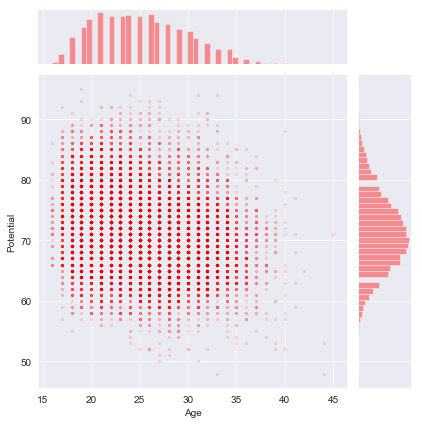

In [20]:
sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

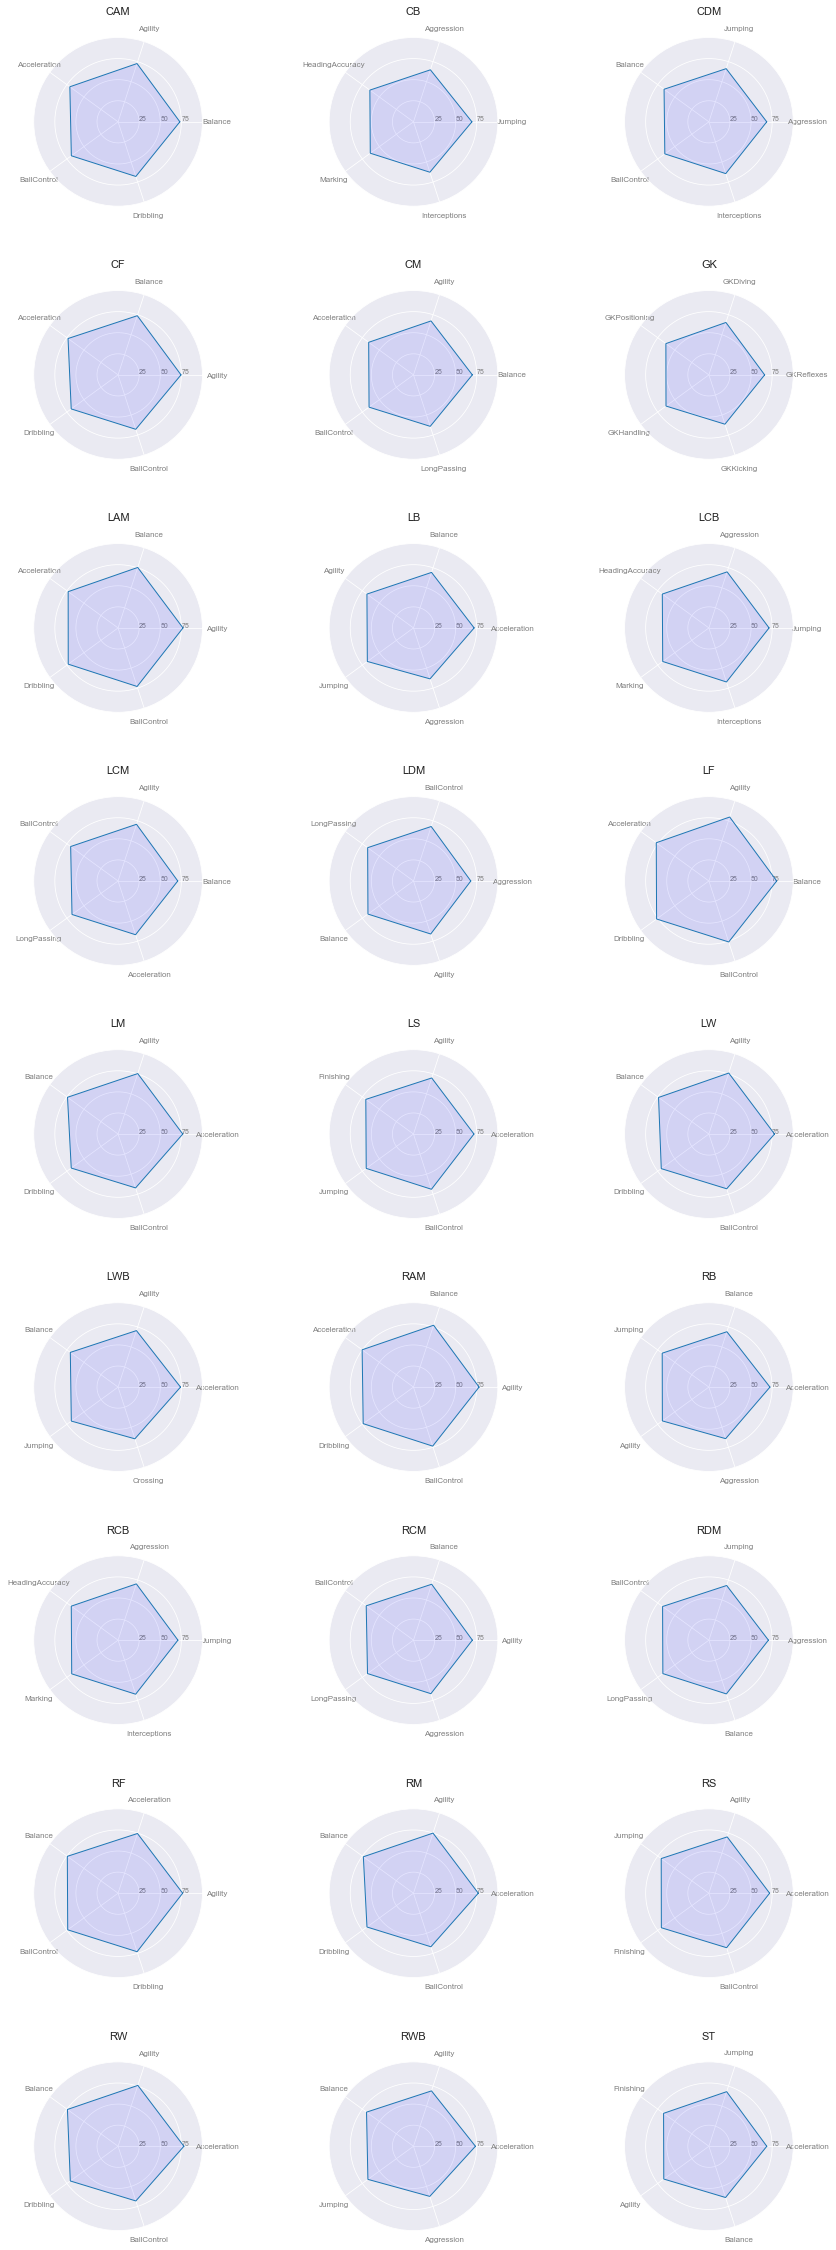

In [21]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

from math import pi
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1

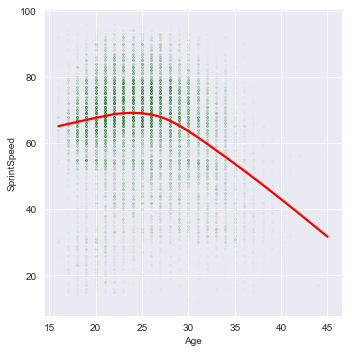

In [22]:
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})

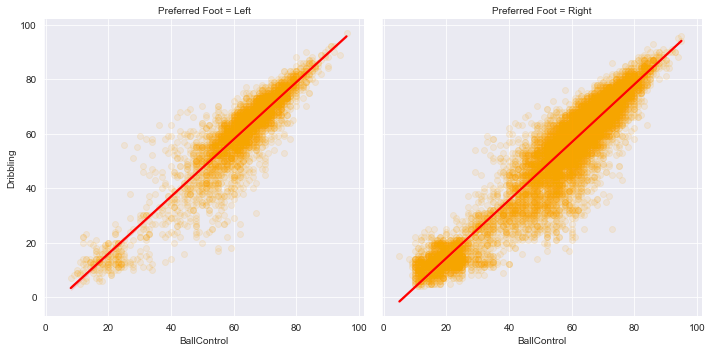

In [23]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})

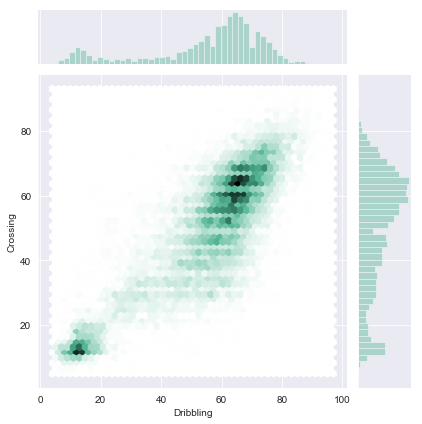

In [24]:
sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind="hex", color="#4CB391")

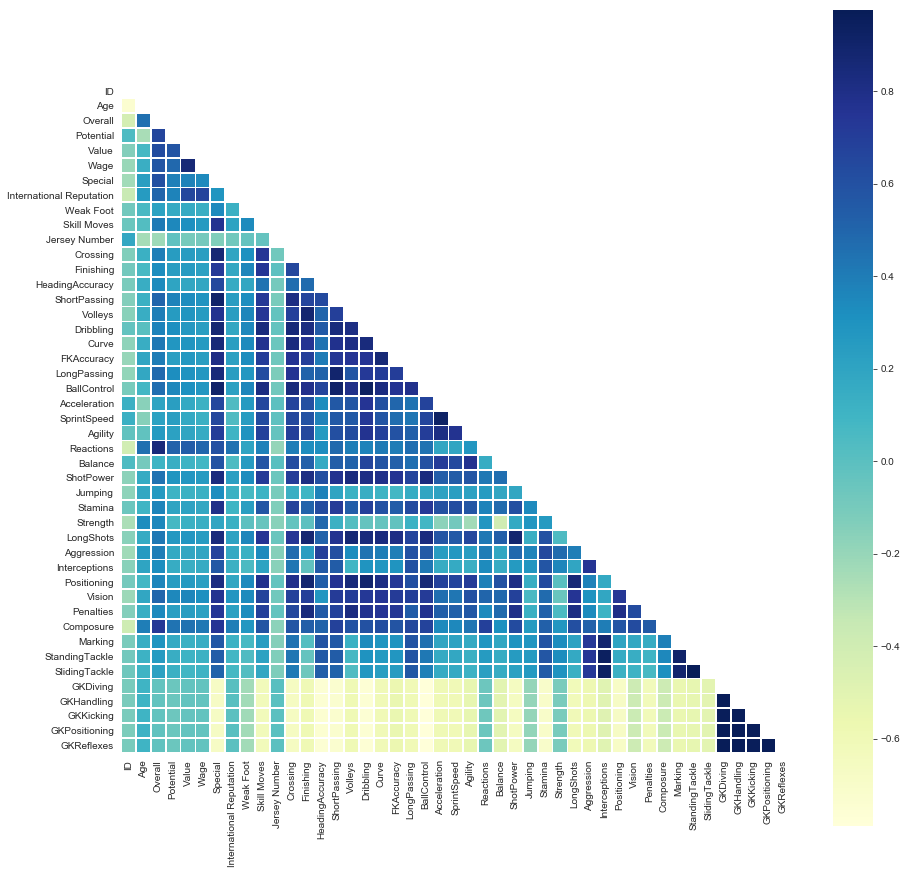

In [25]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

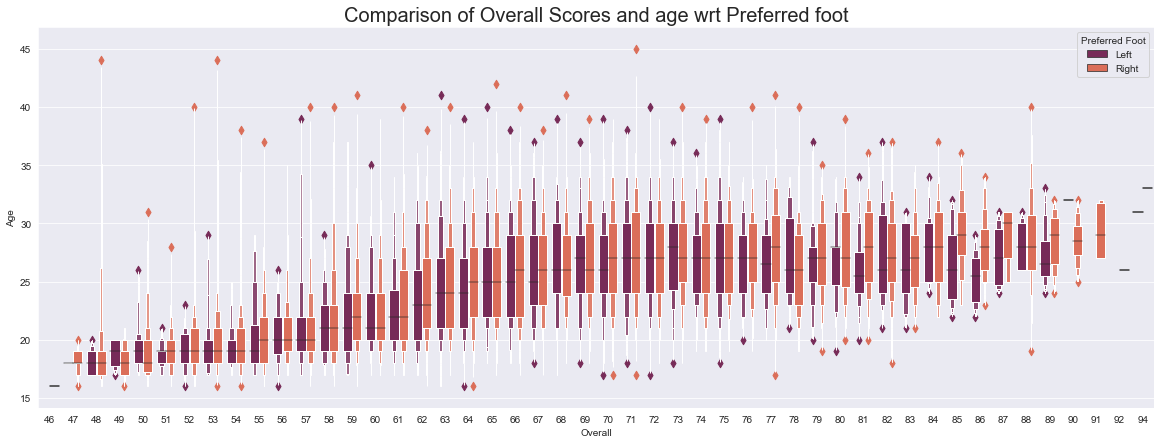

In [26]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(df['Overall'], df['Age'], hue = df['Preferred Foot'], palette = 'rocket')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

In [57]:
df.iloc[0]

Age                                     31
Nationality                      Argentina
Overall                                 94
Potential                               94
Preferred Foot                        Left
International Reputation                 5
Weak Foot                                4
Skill Moves                              4
Work Rate                   Medium/ Medium
Real Face                              Yes
Position                                RF
Crossing                                84
Finishing                               95
HeadingAccuracy                         70
ShortPassing                            90
Volleys                                 86
Dribbling                               97
Curve                                   93
FKAccuracy                              94
LongPassing                             87
BallControl                             96
Acceleration                            91
SprintSpeed                             86
Agility    

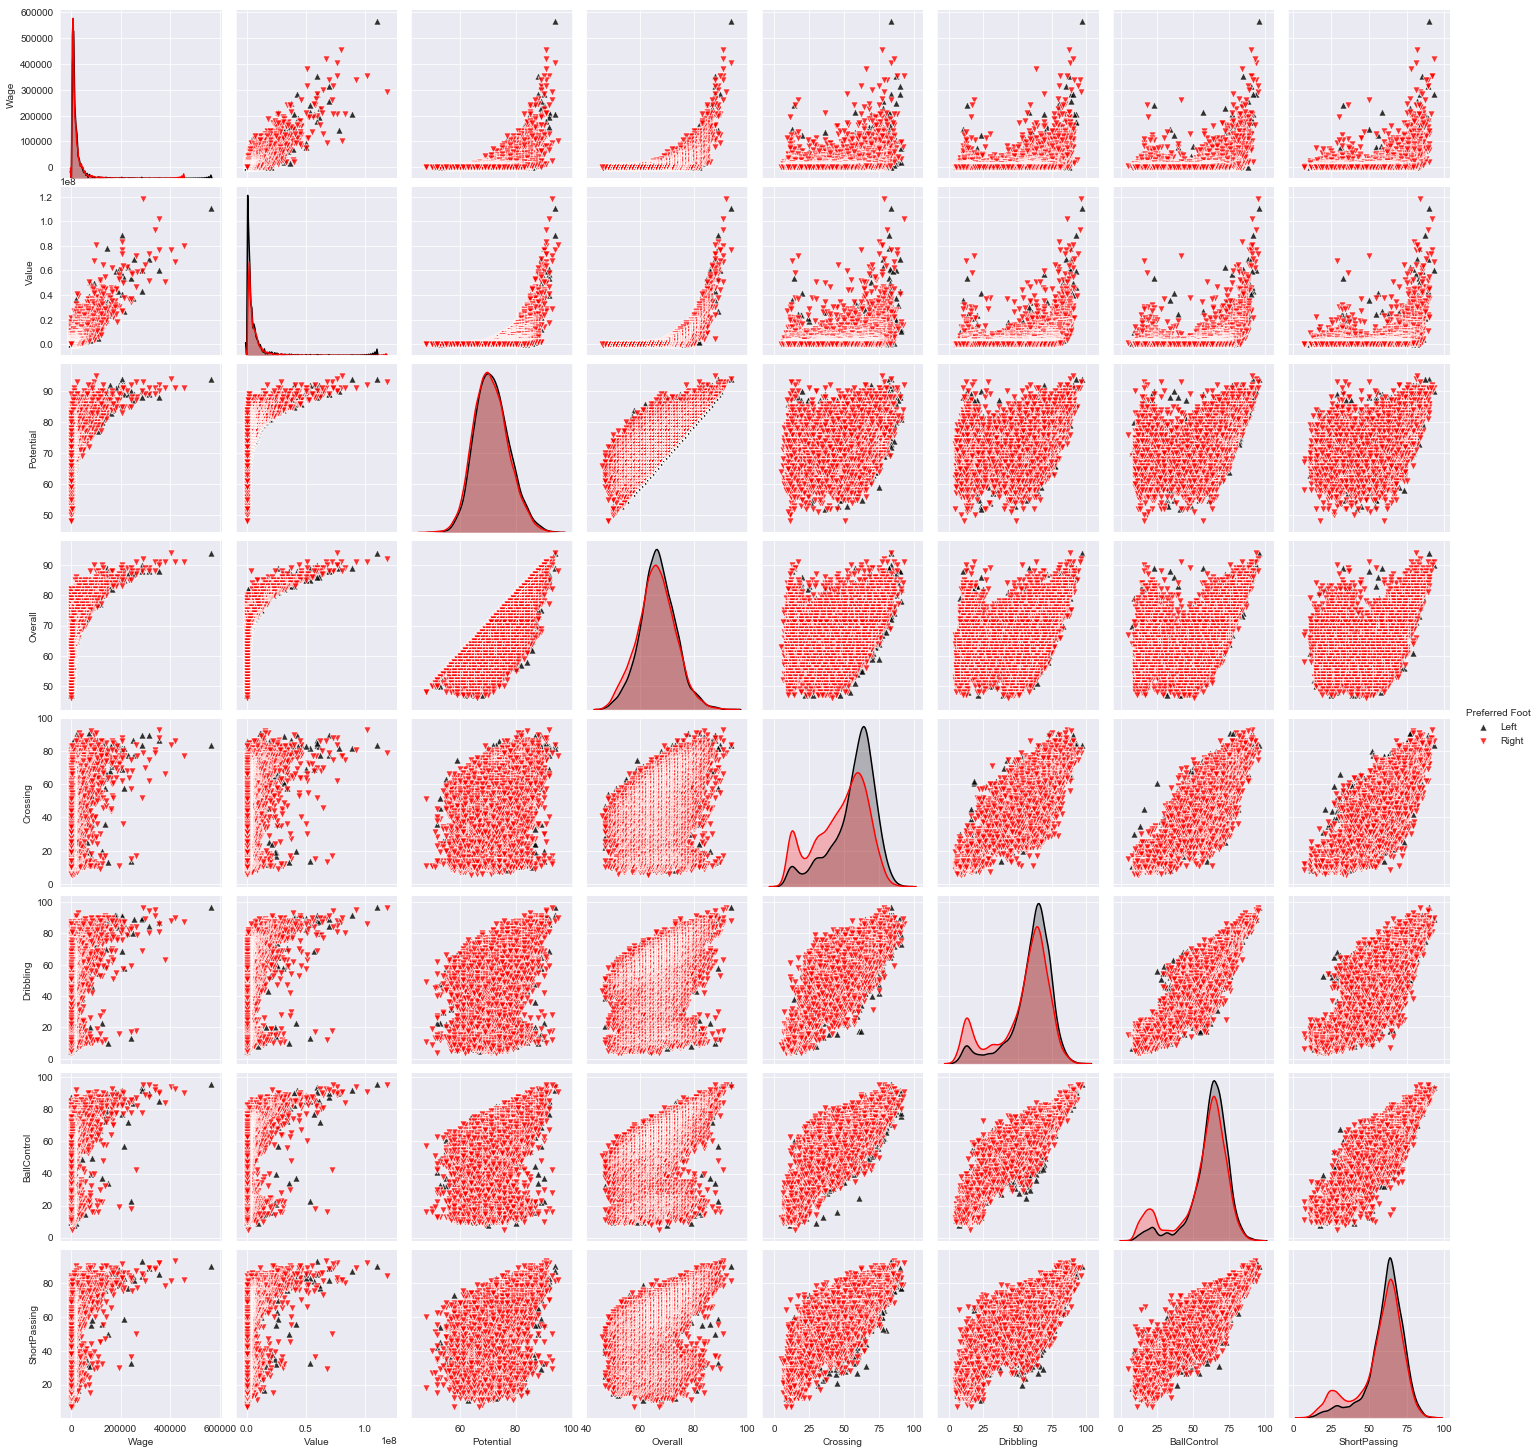

In [29]:
cols = ['Wage','Value','Potential','Overall','Crossing',"Dribbling",'BallControl','ShortPassing',"Preferred Foot"]
df_small = df[cols]
sns.pairplot(df_small, hue ='Preferred Foot',palette=["black", "red"],plot_kws=dict(s=50, alpha =0.8),markers=['^','v'])

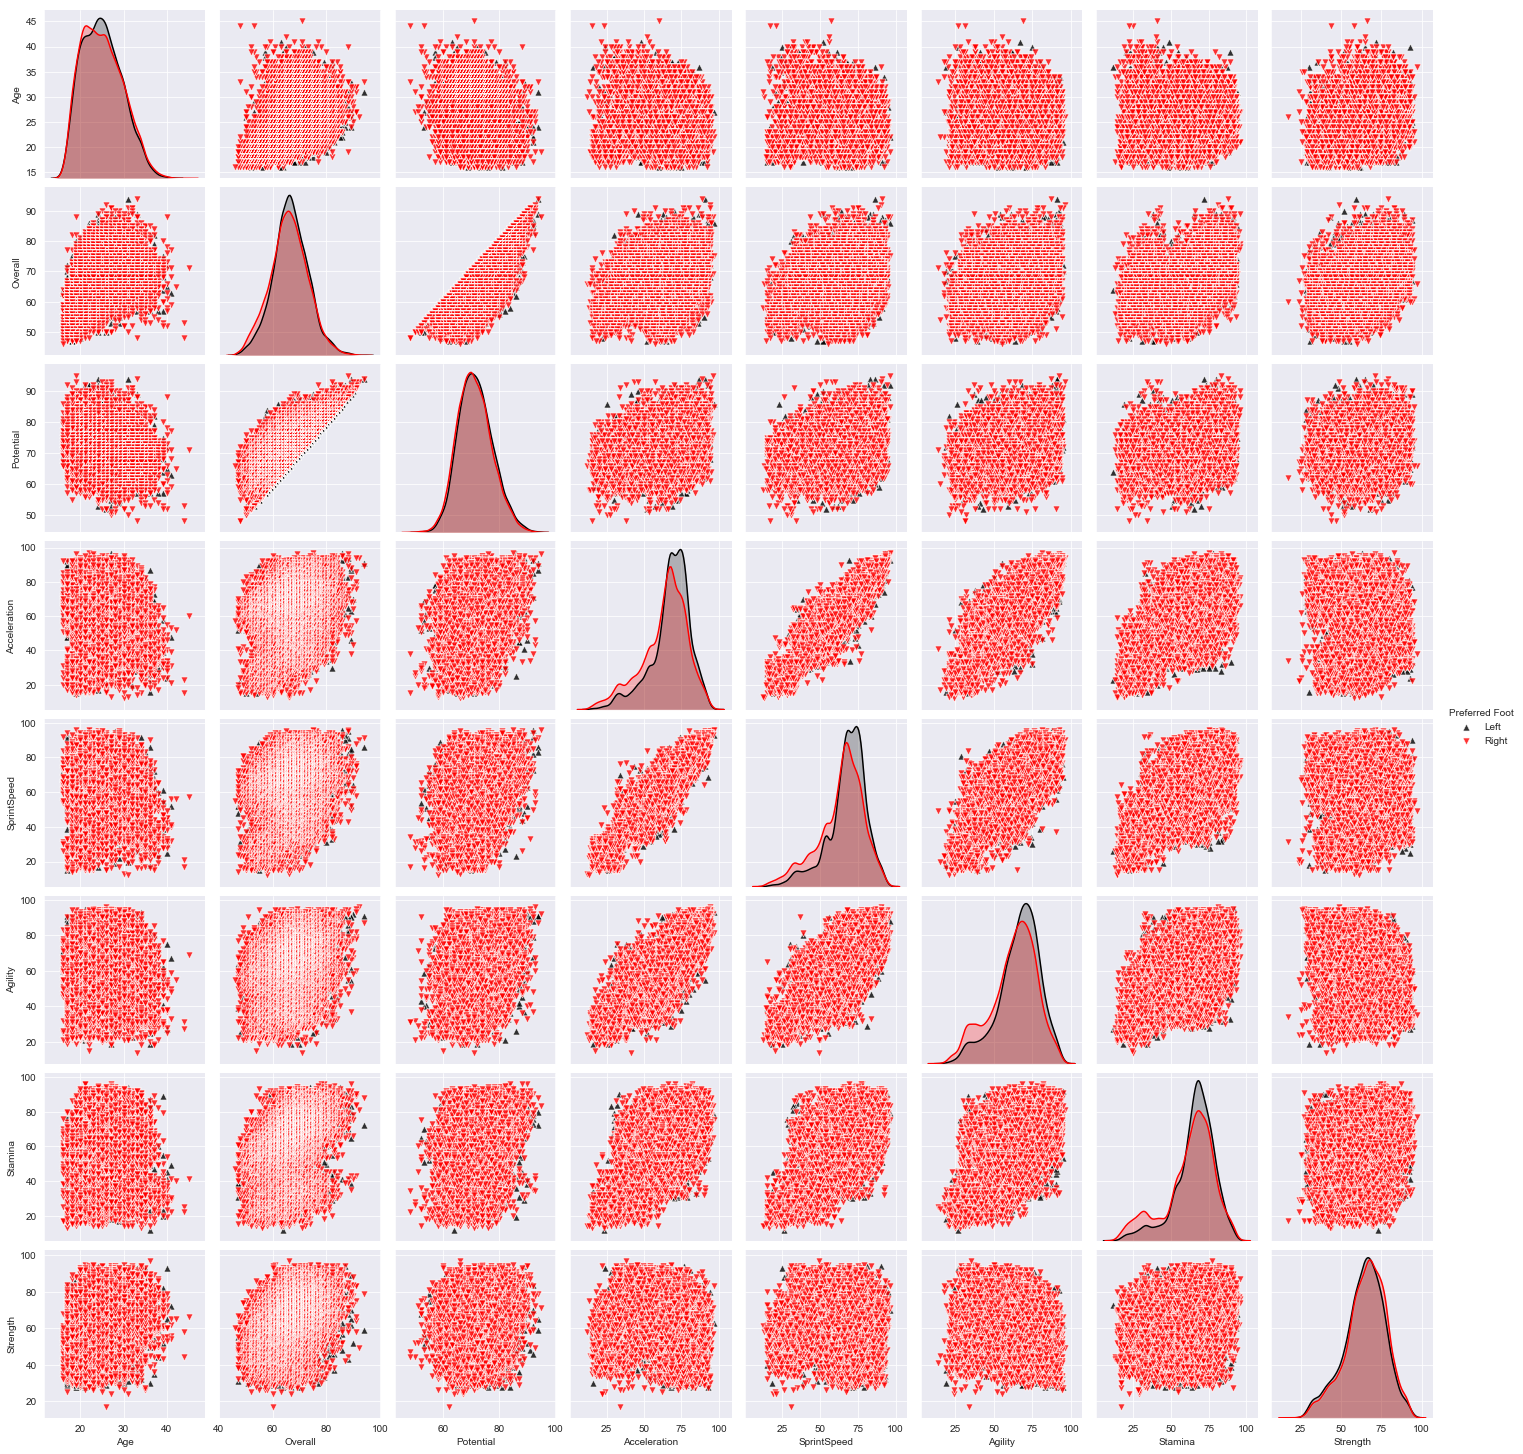

In [53]:
cols = ['Age','Overall','Potential','Acceleration','SprintSpeed',"Agility","Stamina",'Strength','Preferred Foot']
df_small = df[cols]
sns.pairplot(df_small, hue ='Preferred Foot',palette=["black", "red"],plot_kws=dict(s=50, alpha =0.8),markers=['^','v'])

### 4, Modeling

In [34]:
df=pd.read_csv('data/data.csv')

In [35]:
#DROP UNNECESSARY VALUES
drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df = df.dropna()
df.head()

Age Nationality  Overall  Potential Preferred Foot  \
0   31   Argentina       94         94           Left   
1   33    Portugal       94         94          Right   
2   26      Brazil       92         93          Right   
3   27       Spain       91         93          Right   
4   27     Belgium       91         92          Right   

   International Reputation  Weak Foot  Skill Moves       Work Rate Real Face  \
0                       5.0        4.0          4.0  Medium/ Medium       Yes   
1                       5.0        4.0          5.0       High/ Low       Yes   
2                       5.0        5.0          5.0    High/ Medium       Yes   
3                       4.0        3.0          1.0  Medium/ Medium       Yes   
4                       4.0        5.0          4.0      High/ High       Yes   

   ... Penalties  Composure  Marking  StandingTackle  SlidingTackle  GKDiving  \
0  ...      75.0       96.0     33.0            28.0           26.0       6.0   
1  ...      85.0       95.0     28.0            31.0           23.0       7.0   
2  ...      81.0       94.0     27.0            24.0           33.0       9.0   
3  ...      40.0       68.0     15.0            21.0           13.0      90.0   
4  ...      79.0       88.0     68.0            58.0           51.0      15.0   

   GKHandling  GKKicking  GKPositioning  GKReflexes  
0        11.0       15.0           14.0         8.0  
1        11.0       15.0           14.0        11.0  
2         9.0       15.0           15.0        11.0  
3        85.0       87.0           88.0        94.0  
4        13.0        5.0           10.0        13.0  

[5 rows x 45 columns]

In [36]:
#Turn Real Face into a binary indicator variable
def face_to_num(df):
    if (df['Real Face'] == 'Yes'):
        return 1
    else:
        return 0
    
#Turn Preferred Foot into a binary indicator variable
def right_footed(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

#Create a simplified position varaible to account for all player positions
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

In [37]:
#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = df.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

In [38]:
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

In [39]:
#Create a copy of the original dataframe to avoid indexing errors
df1 = df.copy()

#Apply changes to dataset to create new column
df1['Real_Face'] = df1.apply(face_to_num, axis=1)
df1['Right_Foot'] = df1.apply(right_footed, axis=1)
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

In [40]:
#Split the Work Rate Column in two
tempwork = df1["Work Rate"].str.split("/ ", n = 1, expand = True) 
#Create new column for first work rate
df1["WorkRate1"]= tempwork[0]   
#Create new column for second work rate
df1["WorkRate2"]= tempwork[1]
#Drop original columns used
df1 = df1.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df1.head()

Age  Overall  Potential  International Reputation  Weak Foot  Skill Moves  \
0   31       94         94                       5.0        4.0          4.0   
1   33       94         94                       5.0        4.0          5.0   
2   26       92         93                       5.0        5.0          5.0   
3   27       91         93                       4.0        3.0          1.0   
4   27       91         92                       4.0        5.0          4.0   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  ...  GKHandling  \
0      84.0       95.0             70.0          90.0  ...        11.0   
1      84.0       94.0             89.0          81.0  ...        11.0   
2      79.0       87.0             62.0          84.0  ...         9.0   
3      17.0       13.0             21.0          50.0  ...        85.0   
4      93.0       82.0             55.0          92.0  ...        13.0   

   GKKicking  GKPositioning  GKReflexes  Real_Face  Right_Foot  \
0       15.0           14.0         8.0          1           0   
1       15.0           14.0        11.0          1           1   
2       15.0           15.0        11.0          1           1   
3       87.0           88.0        94.0          1           1   
4        5.0           10.0        13.0          1           1   

   Simple_Position  Major_Nation  WorkRate1  WorkRate2  
0               ST             1     Medium     Medium  
1               ST             1       High        Low  
2               AM             1       High     Medium  
3               GK             1     Medium     Medium  
4               MF             1       High       High  

[5 rows x 46 columns]

In [41]:
#Split ID as a Target value
target = df1.Overall
df2 = df1.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 54) (14517, 54)
(3630,) (14517,)


In [42]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9274622590822337
RMSE : 1.854146319095408


In [43]:
from sklearn import tree

clf = tree.DecisionTreeRegressor(max_depth = 10)
clf = clf.fit(X_train, y_train)

In [44]:
predictions = clf.predict(X_test)
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9317736608531517
RMSE : 1.7982001298686023


In [60]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg = reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9643658082865098
RMSE : 1.2995573396945677


In [53]:
X_train

Age  Potential  International Reputation  Weak Foot  Skill Moves  \
16382   18         70                       1.0        2.0          2.0   
11034   20         78                       1.0        3.0          3.0   
2348    25         78                       1.0        2.0          2.0   
12347   33         63                       1.0        3.0          2.0   
2558    21         81                       1.0        2.0          3.0   
...    ...        ...                       ...        ...          ...   
12657   21         70                       1.0        3.0          2.0   
1293    27         76                       1.0        2.0          4.0   
5252    32         70                       1.0        4.0          3.0   
3961    30         72                       1.0        3.0          3.0   
16359   23         64                       1.0        3.0          2.0   

       Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  ...  \
16382      29.0       25.0             53.0          35.0     26.0  ...   
11034      53.0       45.0             57.0          68.0     50.0  ...   
2348       59.0       40.0             76.0          69.0     44.0  ...   
12347      58.0       42.0             43.0          63.0     37.0  ...   
2558       69.0       41.0             64.0          69.0     40.0  ...   
...         ...        ...              ...           ...      ...  ...   
12657      38.0       64.0             61.0          58.0     52.0  ...   
1293       73.0       71.0             57.0          75.0     67.0  ...   
5252       81.0       65.0             43.0          74.0     57.0  ...   
3961       71.0       48.0             50.0          67.0     64.0  ...   
16359      39.0       59.0             53.0          58.0     31.0  ...   

       Simple_Position_DM  Simple_Position_GK  Simple_Position_MF  \
16382                   0                   0                   0   
11034                   1                   0                   0   
2348                    0                   0                   0   
12347                   0                   0                   0   
2558                    0                   0                   0   
...                   ...                 ...                 ...   
12657                   0                   0                   0   
1293                    0                   0                   0   
5252                    0                   0                   1   
3961                    0                   0                   0   
16359                   0                   0                   0   

       Simple_Position_ST  WorkRate1_High  WorkRate1_Low  WorkRate1_Medium  \
16382                   0               0              0                 1   
11034                   0               0              0                 1   
2348                    0               0              0                 1   
12347                   0               0              0                 1   
2558                    0               1              0                 0   
...                   ...             ...            ...               ...   
12657                   1               0              0                 1   
1293                    0               0              0                 1   
5252                    0               0              0                 1   
3961                    0               0              0                 1   
16359                   1               0              0                 1   

       WorkRate2_High  WorkRate2_Low  WorkRate2_Medium  
16382               1              0                 0  
11034               0              0                 1  
2348                0              0                 1  
12347               0              0                 1  
2558                0              0                 1  
...               ...            ...               ...  
12657               0              0    

In [52]:
X_train.columns[model.coef_.argsort()]

Index(['Simple_Position_DM', 'Simple_Position_ST', 'Major_Nation',
       'Simple_Position_MF', 'WorkRate2_Medium', 'WorkRate1_High',
       'WorkRate1_Medium', 'WorkRate2_High', 'SlidingTackle', 'Right_Foot',
       'Positioning', 'Balance', 'Vision', 'Penalties', 'Curve', 'Volleys',
       'LongShots', 'Aggression', 'Weak Foot', 'Interceptions', 'Jumping',
       'Crossing', 'FKAccuracy', 'Dribbling', 'Agility', 'LongPassing',
       'Marking', 'ShotPower', 'StandingTackle', 'Acceleration', 'SprintSpeed',
       'Finishing', 'GKKicking', 'GKPositioning', 'Strength', 'Stamina',
       'Composure', 'GKHandling', 'HeadingAccuracy', 'GKDiving',
       'ShortPassing', 'GKReflexes', 'BallControl', 'Simple_Position_AM',
       'Reactions', 'Simple_Position_GK', 'WorkRate2_Low', 'WorkRate1_Low',
       'International Reputation', 'Real_Face', 'Age', 'Potential',
       'Skill Moves', 'Simple_Position_DF'],
      dtype='object')

### Alternative position category

In [69]:
df.columns

Index(['Age', 'Nationality', 'Overall', 'Potential', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Real Face', 'Position', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [71]:
df_visual = df.drop(['Nationality', "Overall", "Potential", "Preferred Foot", "Weak Foot", "Work Rate", "Real Face", "Position"], axis = 1)

In [72]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(df_visual)

In [74]:
cla = df["Position"]

0         RF
1         ST
2         LW
3         GK
4        RCM
        ... 
18202     CM
18203     ST
18204     ST
18205     RW
18206     CM
Name: Position, Length: 18147, dtype: object

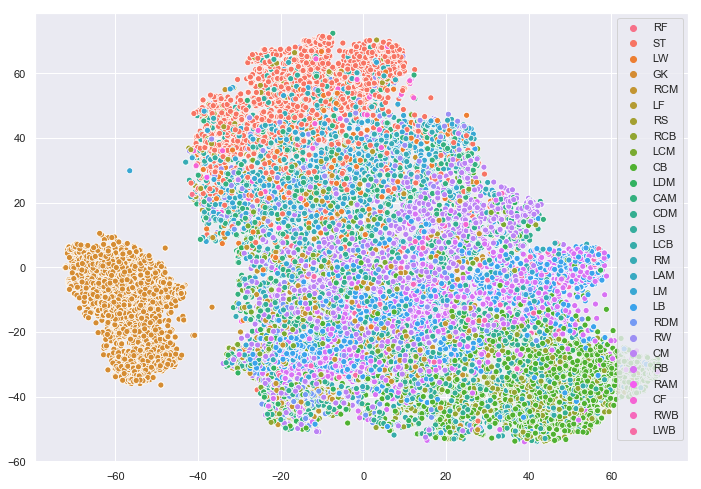

In [75]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue = np.array(cla))



In [61]:
def simple_position_plus(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'FB'
    elif ((df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB')):
        return "CB"
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM')):
        return 'CM'
    elif ((df['Position'] == 'LW') | (df['Position'] == 'RW') | (df['Position'] == 'LM') | (df['Position'] == 'RM')):
        return 'W'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

In [63]:
#Create a copy of the original dataframe to avoid indexing errors
df2 = df.copy()

#Apply changes to dataset to create new column
df2['Real_Face'] = df2.apply(face_to_num, axis=1)
df2['Right_Foot'] = df2.apply(right_footed, axis=1)
df2['Simple_Position'] = df2.apply(simple_position,axis = 1)
df2['Major_Nation'] = df2.apply(major_nation,axis = 1)

In [65]:
#Split the Work Rate Column in two
tempwork = df2["Work Rate"].str.split("/ ", n = 1, expand = True) 
#Create new column for first work rate
df2["WorkRate1"]= tempwork[0]   
#Create new column for second work rate
df2["WorkRate2"]= tempwork[1]
#Drop original columns used
df2 = df2.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df2.head()

Age  Overall  Potential  International Reputation  Weak Foot  Skill Moves  \
0   31       94         94                       5.0        4.0          4.0   
1   33       94         94                       5.0        4.0          5.0   
2   26       92         93                       5.0        5.0          5.0   
3   27       91         93                       4.0        3.0          1.0   
4   27       91         92                       4.0        5.0          4.0   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  ...  GKHandling  \
0      84.0       95.0             70.0          90.0  ...        11.0   
1      84.0       94.0             89.0          81.0  ...        11.0   
2      79.0       87.0             62.0          84.0  ...         9.0   
3      17.0       13.0             21.0          50.0  ...        85.0   
4      93.0       82.0             55.0          92.0  ...        13.0   

   GKKicking  GKPositioning  GKReflexes  Real_Face  Right_Foot  \
0       15.0           14.0         8.0          1           0   
1       15.0           14.0        11.0          1           1   
2       15.0           15.0        11.0          1           1   
3       87.0           88.0        94.0          1           1   
4        5.0           10.0        13.0          1           1   

   Simple_Position  Major_Nation  WorkRate1  WorkRate2  
0               ST             1     Medium     Medium  
1               ST             1       High        Low  
2               AM             1       High     Medium  
3               GK             1     Medium     Medium  
4               MF             1       High       High  

[5 rows x 46 columns]

In [66]:
#Split ID as a Target value
target = df2.Overall
df_feature = df2.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feature, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 54) (14517, 54)
(3630,) (14517,)


In [67]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg = reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9664780922002055
RMSE : 1.2569598407368348


### Classification

In [85]:
cla = df["Position"].to_frame()
cla['Position'] = cla.apply(simple_position,axis = 1)

In [86]:
cla

Position
0           ST
1           ST
2           AM
3           GK
4           MF
...        ...
18202       MF
18203       ST
18204       ST
18205       AM
18206       MF

[18147 rows x 1 columns]

In [87]:
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder()
enc.fit(cla.to_numpy().reshape(-1,1))

OrdinalEncoder()

In [88]:
cla = enc.transform(cla.to_numpy().reshape(-1,1))

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df_visual, cla.reshape(-1), test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 37) (14517, 37)
(3630,) (14517,)


In [95]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [96]:
from sklearn.metrics import accuracy_score

prediction = model.predict(X_test)
print("ACC:", accuracy_score(prediction, y_test))

ACC: 0.7765840220385675


In [97]:
from sklearn.ensemble import GradientBoostingClassifier

reg = GradientBoostingClassifier(random_state=0)
reg = reg.fit(X_train, y_train)
predictions = reg.predict(X_test)


ACC: 0.7765840220385675


In [98]:
print("ACC:", accuracy_score(predictions, y_test))

ACC: 0.7865013774104683
